In [52]:
# !pip install matplotlib
# !pip install pandas
# !pip install numpy

In [53]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## Generate time/#threads plots

In [54]:
def get_serial_data(size_of_matrix, jobid, print_df =False):
    directory_path = './outputs/timings'
    files = os.listdir(directory_path)
    csv_file = [file for file in files if "serial" in file and str(jobid) in file]
    if csv_file:
        csv_file_path = os.path.join(directory_path, csv_file[0])
        df = pd.read_csv(csv_file_path)
        if print_df:
            print("\nSerial times:")
            print(df)
    else:
        print("No CSV file with the name 'serial-data' found.")

    serial_time = df[df["dim"] == size_of_matrix]["time"]
    return serial_time

In [55]:
data1 = pd.read_csv("./outputs/timings/openmp-scal-740667.csv")
data2 = pd.read_csv("./outputs/timings/openmp-scal-740543.csv")
data3 = pd.read_csv("./outputs/timings/openmp-scal-740549.csv")

data = pd.concat([data1, data2, data3], ignore_index=True)
data.head()

,dim,nthreads,time
0,2000,1,45.523924
1,2000,2,86.026052
2,2000,3,79.548514
3,2000,4,72.607147
4,2000,5,70.921277


In [56]:
df100 = data[data["dim"] == 100]
df500 = data[data["dim"] == 500]
df1000 = data[data["dim"] == 1000]
df1500 = data[data["dim"] == 1500]
df2000 = data[data["dim"] == 2000]

## Serial times

In [57]:
SERIAL_JOBID = 743101

serial100 = get_serial_data(size_of_matrix=100, jobid=SERIAL_JOBID, print_df=True)
serial500 = get_serial_data(size_of_matrix=500, jobid=SERIAL_JOBID)
serial1000 = get_serial_data(size_of_matrix=1000, jobid=SERIAL_JOBID)
serial1500 = get_serial_data(size_of_matrix=1500, jobid=SERIAL_JOBID)
serial2000 = get_serial_data(size_of_matrix=2000, jobid=SERIAL_JOBID)
print(serial100)
print(serial500)
print(serial1000)
print(serial1500)
print(serial2000)


Serial times:
    dim  nthreads   time
0  1000         1   5.79
1  1500         1  13.09
2  2000         1  23.32
Series([], Name: time, dtype: float64)
Series([], Name: time, dtype: float64)
0    5.79
Name: time, dtype: float64
1    13.09
Name: time, dtype: float64
2    23.32
Name: time, dtype: float64


In [58]:
#Add speedup column
def add_speedup_and_normalized_t_columns(data: pd.DataFrame, serial_time):
    data["speedup"] = serial_time / (data["time"])
    print(f"type of serial_time element = {type(serial_time.iloc[1])}\n, type of data['time'] elements = {type(data['time'].iloc[1])}\n\n")
    max_time = data["time"].max()
    data["max_normalized"] = data["time"].div(max_time)

add_speedup_and_normalized_t_columns(df100, serial100)
add_speedup_and_normalized_t_columns(df500, serial500)
add_speedup_and_normalized_t_columns(df1000, serial1000)
add_speedup_and_normalized_t_columns(df1500, serial1500)
add_speedup_and_normalized_t_columns(df2000, serial2000)

/tmp/ipykernel_2285377/3869157992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["speedup"] = serial_time / (data["time"])


IndexError: single positional indexer is out-of-bounds

In [ ]:
df2000.head()

,dim,nthreads,time,speedup,max_normalized
0,2000,1,45.523924,NaN,0.529188
1,2000,2,86.026052,NaN,1.000000
2,2000,3,79.548514,0.293154,0.924703
3,2000,4,72.607147,NaN,0.844013
4,2000,5,70.921277,NaN,0.824416


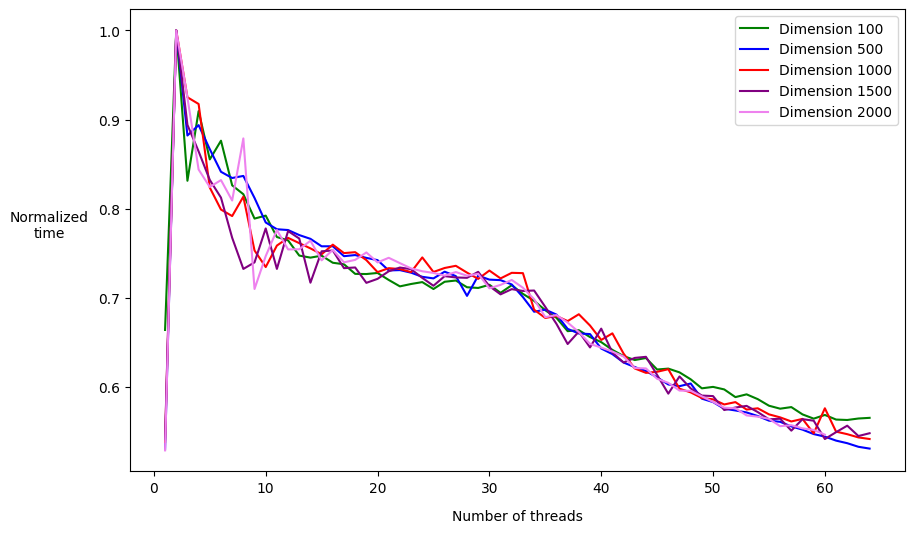

In [ ]:
dataframes = [
    (df100, "Dimension 100", "green"),
    (df500, "Dimension 500", "blue"),
    (df1000, "Dimension 1000", "red"),
    (df1500, "Dimension 1500", "purple"),
    (df2000, "Dimension 2000", "violet")
]

plt.figure(figsize=(10, 6))

for df, label, color in dataframes:
    plt.plot(df["nthreads"], df["max_normalized"], label=label, color=color)

plt.xlabel("Number of threads", labelpad=10, fontsize=10)
plt.ylabel("Normalized\ntime", labelpad=35, rotation=0, fontsize=10)
plt.legend()
plt.show()

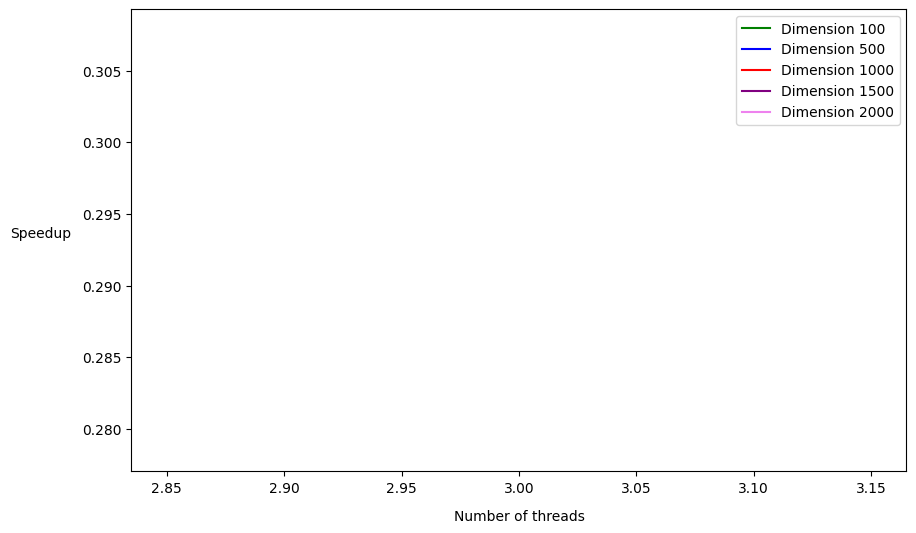

In [ ]:
plt.figure(figsize=(10, 6))

for df, label, color in dataframes:
    plt.plot(df["nthreads"], df["speedup"], label=label, color=color)

plt.xlabel("Number of threads", labelpad=10, fontsize=10)
plt.ylabel("Speedup", labelpad=30, rotation=0, fontsize=10)
plt.legend()
plt.show()